In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from  sklearn.cluster import KMeans,SpectralBiclustering,SpectralClustering

raw_data=pd.read_csv("data/rawdata.csv")

raw_data

,title,work_id,rating,score_num,comment_num,ratio,5star_num,4star_num,3star_num,2star_num,1star_num,watched_num
0,肖申克的救赎,1292052,9.7,2826380,553533,0.196,392,103,26,15,8,4617672.0
1,霸王别姬,1291546,9.6,2094515,445227,0.213,410,69,14,16,10,3545877.0
2,阿甘正传,1292720,9.5,2116313,354470,0.167,345,128,25,8,12,3838521.0
3,泰坦尼克号,1292722,9.5,2124229,422456,0.199,368,144,24,6,2,3957269.0
4,这个杀手不太冷,1295644,9.4,2250555,383893,0.171,356,137,24,11,7,4140356.0
...,...,...,...,...,...,...,...,...,...,...,...,...
325,沉香如屑·沉香重华,35029547,5.9,522432,320607,0.614,131,83,95,121,125,746331.0
326,冰雨火,34908108,7.3,164681,92972,0.565,207,74,134,74,58,235258.0
327,幸福到万家,34951002,7.1,243179,133022,0.547,170,73,139,96,79,347398.0
328,奇迹·笨小孩,35312437,7.4,540284,207305,0.384,197,172,130,24,29,771834.0


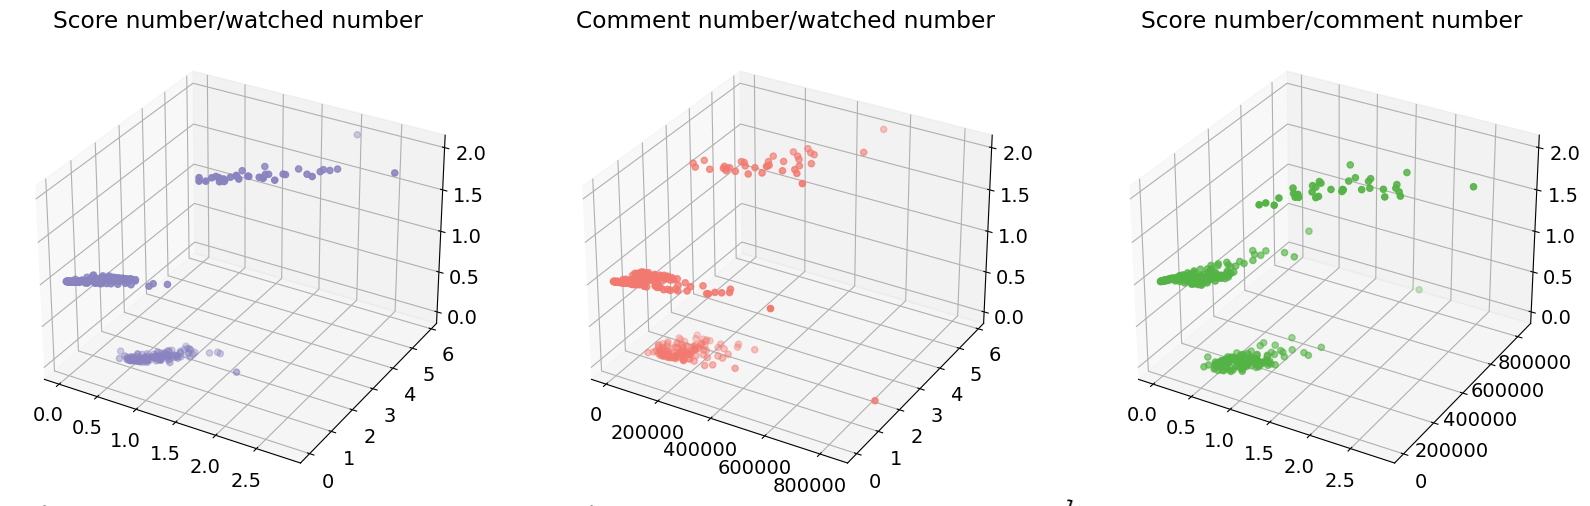

In [3]:
# score_num,comment_num,watched_num
X=raw_data.iloc[:,[3,4,11]]

sc=SpectralBiclustering()
sc.fit(X)

labels=sc.row_labels_

plt.rcParams["font.size"]=14
plt.figure(figsize=(20,15))

ax = plt.subplot(131,projection = '3d')
ax.set_title('Score number/watched number')
ax.scatter(X["score_num"],X["watched_num"],labels,c="#8983BF")

ax = plt.subplot(132,projection = '3d')
ax.set_title('Comment number/watched number')
ax.scatter(X["comment_num"],X["watched_num"],labels,c="#F27970")

ax = plt.subplot(133,projection = '3d')
ax.set_title('Score number/comment number')
ax.scatter(X["score_num"],X["comment_num"],labels,c="#54B345")

plt.show()

f:\anaconda\envs\spider\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


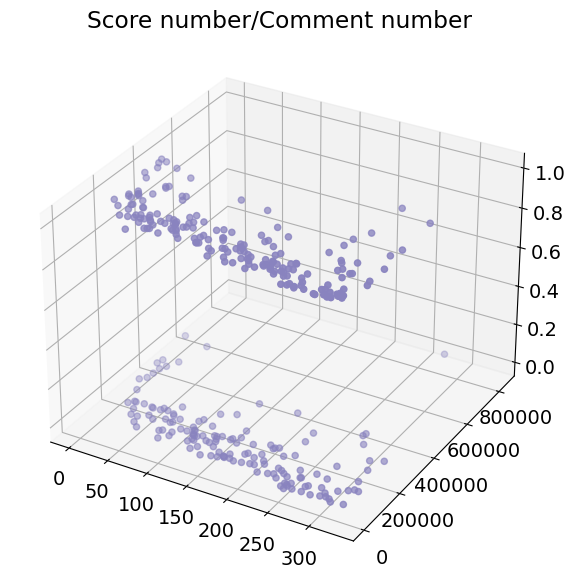

In [4]:
# score_num,comment_num,watched_num
X=raw_data.loc[:,["score_num","comment_num","ratio"]]

sc=SpectralClustering(n_clusters=2)
sc.fit(X)

labels=sc.labels_

plt.rcParams["font.size"]=14
plt.figure(figsize=(15,7))

ax = plt.subplot(111,projection = '3d')
ax.set_title('Score number/Comment number')
ax.scatter(range(len(X["comment_num"])),X["comment_num"],labels,c="#8983BF")

plt.show()

f:\anaconda\envs\spider\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


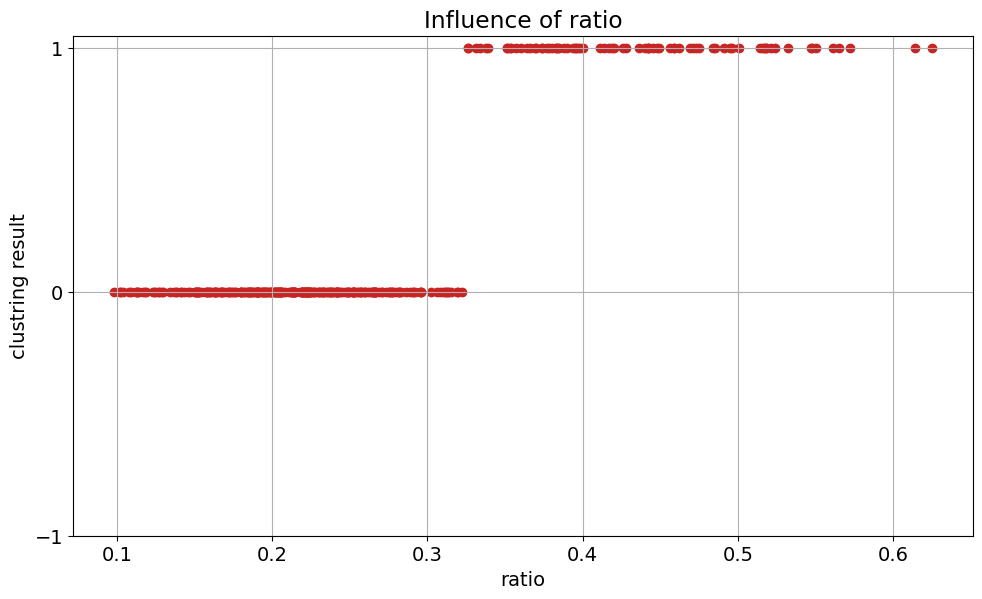

In [5]:
# score_num,comment_num,watched_num
X=raw_data.loc[:,["ratio"]]

km=KMeans(n_clusters=2)
km.fit(X)

labels=km.labels_

fig=plt.figure(figsize=(9,5))
ax=fig.add_axes([0,0,1,1])

ax.scatter(X["ratio"],labels,c="#c82423")
ax.set_yticks([-1,0,1])
ax.set_xlabel("ratio")
ax.set_ylabel("clustring result")
ax.set_title("Influence of ratio")

plt.grid()
plt.show()

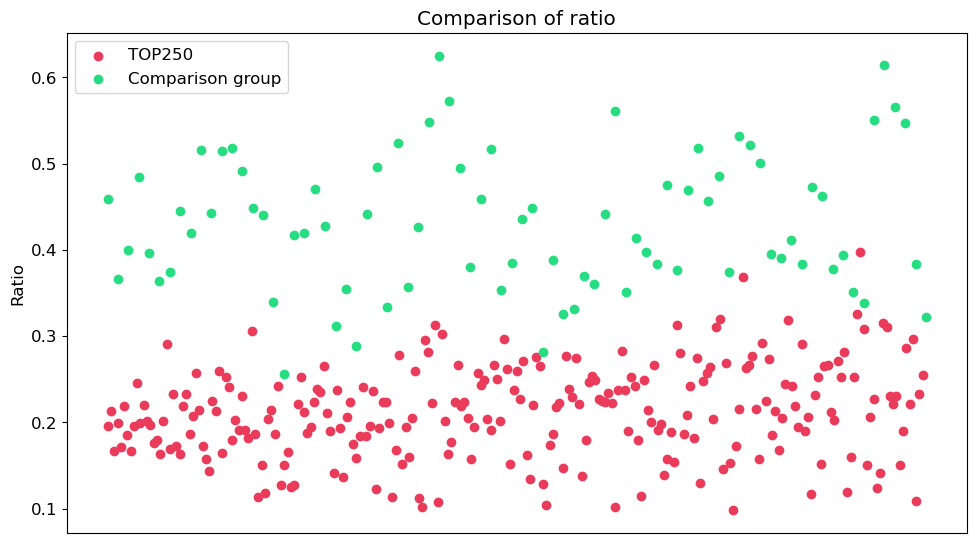

In [19]:
import numpy as np
x=raw_data["ratio"]

plt.rcParams["font.size"]=12
fig=plt.figure(figsize=(9,5))
ax=fig.add_axes([0,0,1,1])

ax.scatter(range(250),x[:250],c="#eb3b5a")
ax.scatter(np.linspace(0,250,80),x[250:],c="#26de81")

ax.set_ylabel("Ratio")
ax.set_title("Comparison of ratio")
ax.legend(["TOP250","Comparison group"])
ax.set_xticks([])

plt.show()